# 분류 classification
미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것 \
이진 분류, 다중 분류 \

# 회귀 regression
연속적인 숫자 또는 부동소수점수를 예측하는 것 \
ex) 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 \

## 과대적합과 과소적합
과대적합 : 너무 복잡한 모델, 훈련세트에 너무fit한 모델 \
과소적합 : 너무 간단한 모델

# forge 데이터셋

d:\apps\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
d:\apps\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
d:\apps\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)

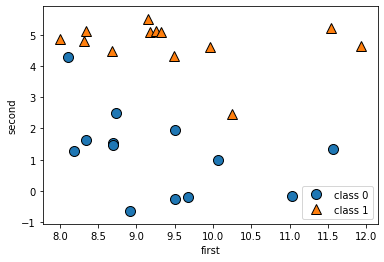

In [1]:
import mglearn
from matplotlib import pyplot as plt

# 데이터 셋 생성
x, y = mglearn.datasets.make_forge()

# 산점도를 그림
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(["class 0", "class 1"], loc = 4)
plt.xlabel("first")
plt.ylabel("second")

x.shape

d:\apps\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


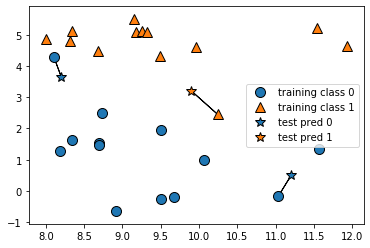

In [2]:
# 최고 근접한 1개의 점을 가지고 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

d:\apps\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


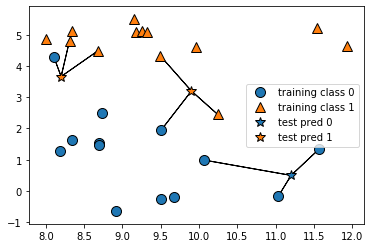

In [3]:
# 최고 근접한 3개의 점을 가지고 분류
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
from sklearn.model_selection import train_test_split
x, y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

d:\apps\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
# knn 클래스 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 훈련 데이터 셋으로 모델을 만듬
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [6]:
# 테스트 셋 결과 값, score 출력
print(format(clf.predict(x_test)))
print(format(clf.score(x_test, y_test)))

[1 0 1 0 1 0 0]
0.8571428571428571


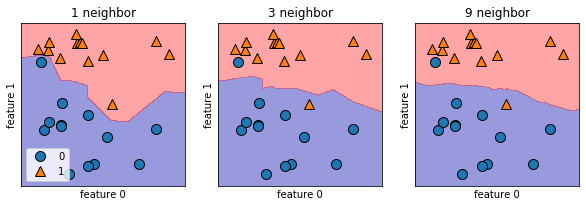

In [7]:
# n_neighbors 값 1, 3, 9 일때 결과 확인
# 이웃의 수에따라 결과오 결정경계다 복잡한지 확인
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax = ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax = ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [8]:
del x
del y

# 웨이브 데이터셋

Text(0, 0.5, 'target')

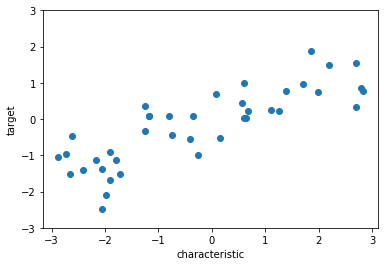

In [25]:
x, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(x, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("characteristic")  # 특성
plt.ylabel("target")          # 타겟

In [26]:
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [29]:
print(reg.predict(x_test))
print(reg.score(x_test, y_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
0.8344172446249604


# 위스콘신 유방암 데이터 셋

In [11]:
from sklearn.datasets import load_breast_cancer

# 위스콘신 유방암 데이터셋
cancer = load_breast_cancer()

# 키와 데이터의 크기 체크
print(cancer.keys())
print(cancer.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [12]:
import numpy as np

print(format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

# malignant : 악성
# benign : 양성

{'malignant': 212, 'benign': 357}


In [13]:
# 특성이름
print(format(cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
# key 중 설명 보기
print(cancer['DESCR'][:100])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
---------------------------


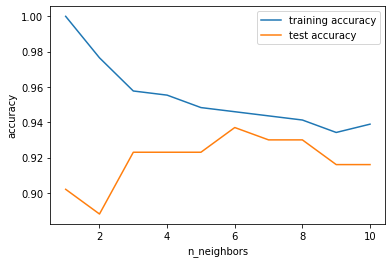

In [15]:
# 모델의 복잡도와 일반화 사이의 관계 입증

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

# n_neighbors 1개에서 10개 까지 훈련셋 정확도와 테스트셋 정확도
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()